# **Génération, analyse et classification de trajectoires d'objets**

 Dans le cadre de notre projet S9 à l'ENSEIRB, nous(groupe de 5) allons travailler sur la classification de trajectoires.
- **Description du projet**: 


## **1. Génération de trajectoires synthétiques**

### **1.1 Cas des MRU dans le plan:**

- **Obtension des paramètres de la représentation d'état**



### **1.1.1 Modèle Continu**

Dans ce modèle, l'état est défini par les positions et les vitesses dans le plan. Le vecteur d'état est donc :

$$
x(t) = \begin{bmatrix} x(t) \\ \frac{dx(t)}{dt} \\ y(t) \\ \frac{dy(t)}{dt} \end{bmatrix}
$$

L'équation de mouvement pour le système dans le plan est donnée par :

$$
\frac{dx(t)}{dt} = A \cdot x(t) + B \cdot w(t)
$$

où :
- `x(t)` est le vecteur d'état : $\begin{bmatrix} x(t) & \frac{dx(t)}{dt} & y(t) & \frac{dy(t)}{dt} \end{bmatrix}$,
- `A` est la matrice de transition continue, et
- `B` est la matrice d'entrée du bruit.

La matrice de transition continue `A` est :

$$
A = \begin{bmatrix} 
0 & 1 & 0 & 0 \\ 
0 & 0 & 0 & 0 \\ 
0 & 0 & 0 & 1 \\ 
0 & 0 & 0 & 0 
\end{bmatrix}
$$

La matrice d'entrée `B` pour le bruit `w(t)` est :

$$
B = \begin{bmatrix} 
0 & 0 \\ 
1 & 0 \\ 
0 & 0 \\ 
0 & 1 
\end{bmatrix}
$$

où le bruit `w(t)` est un vecteur gaussien de dimension 2 avec une variance `q = ngT`.

### **1.1.2. Solution de l'Équation de l'État**

Nous résolvons l'équation différentielle en utilisant la solution générale pour un système linéaire :

$$
x(t) = e^{A(t - t_0)} x(t_0) + \int_{t_0}^{t} e^{A(t - \tau)} B w(\tau) \, d\tau
$$

### **1.1.3. Discrétisation**

Pour passer à un modèle discret, nous prenons `t = (k+1)*T` et `t0 = k*T`, où `T` est la période d'échantillonnage. L'équation devient alors :
$$
x((k+1)T) = e^{A T} x(kT) + \int_{kT}^{(k+1)T} e^{A((k+1)T - \tau)} B w(\tau) \, d\tau
$$

#### **1.1.3.1 Matrice de Transition Discrète `Phi(k)`**

La matrice de transition discrète `Phi(k)` est définie comme :

$$
\Phi(k) = e^{AT}
$$

Pour calculer l'exponentielle de la matrice `A`, nous utilisons son développement en série de Taylor. Nous obtenons l'exponentielle matricielle suivante à l'ordre 1 :

$$
e^{A T} = \begin{bmatrix} 
1 & T & 0 & 0 \\ 
0 & 1 & 0 & 0 \\ 
0 & 0 & 1 & T \\ 
0 & 0 & 0 & 1 
\end{bmatrix}
$$


#### **1.1.3.2 Modèle du Bruit**

Pour la contribution du bruit, nous devons calculer l'intégrale suivante :

$$
u(k) = \int_{kT}^{(k+1)T} e^{A((k+1)T - \tau)} B w(\tau) \, d\tau
$$
Nous obtenons, après intégration, la contribution du bruit dans les deux dimensions :

$$
u(k) = \begin{bmatrix} 
\frac{T^2}{2} & 0 \\ 
T & 0 \\ 
0 & \frac{T^2}{2} \\ 
0 & T 
\end{bmatrix} w(kT)
$$

#### **1.1.3.3 Covariance du Bruit**

La covariance du bruit `Q` est donnée par la matrice `E[u(k) * u(k)^T]`. En utilisant l'expression de `u(k)`, nous obtenons la matrice de covariance :

$$
Q = q \begin{bmatrix} 
\frac{T^3}{3} & \frac{T^2}{2} & 0 & 0 \\ 
\frac{T^2}{2} & T & 0 & 0 \\ 
0 & 0 & \frac{T^3}{3} & \frac{T^2}{2} \\ 
0 & 0 & \frac{T^2}{2} & T 
\end{bmatrix}
$$

Cette matrice `Q` décrit la covariance du bruit ajouté à chaque pas de temps.
### **1.1.4. Modèle Discret Final**

Le modèle discret final s'écrit :
$$
x((k+1)T) = \Phi(k) \cdot x(kT) + u(k)
$$

où :
$$\Phi(k) = \begin{bmatrix}
1 & T & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & T \\
0 & 0 & 0 & 1
\end{bmatrix}
$$

$$ u(k) = \begin{bmatrix}
\frac{T^2}{2} & 0 \\
T & 0 \\
0 & \frac{T^2}{2} \\
0 & T
\end{bmatrix} w(kT)$$
- et la covariance du bruit est :
$$Q = q \begin{bmatrix}
\frac{T^3}{3} & \frac{T^2}{2} & 0 & 0 \\
\frac{T^2}{2} & T & 0 & 0 \\
0 & 0 & \frac{T^3}{3} & \frac{T^2}{2} \\
0 & 0 & \frac{T^2}{2} & T
\end{bmatrix} $$

### **Librairies utilies**

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys 


### **Code pour générer une seule trajectoire**

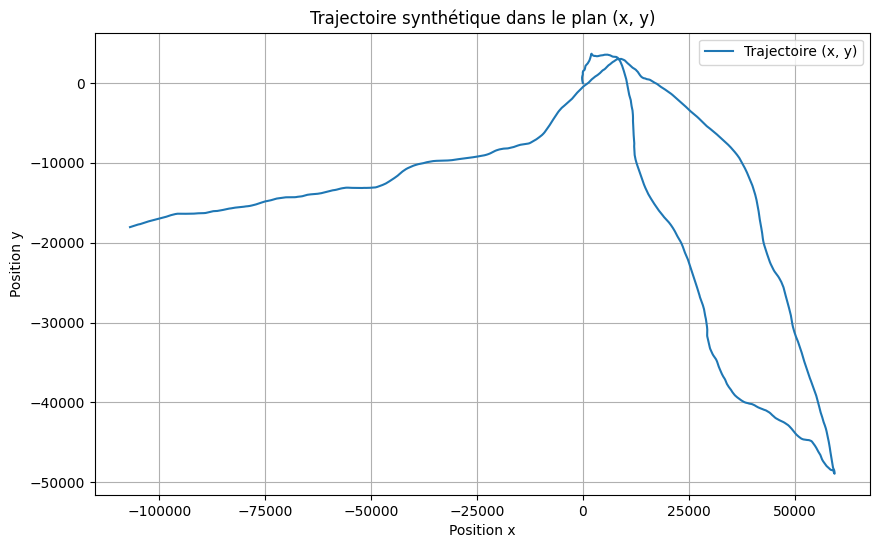

In [27]:
T = 1  
q = 19.5  
N = 1028  

Phi = np.array([[1, T, 0, 0],   
                [0, 1, 0, 0],
                [0, 0, 1, T],
                [0, 0, 0, 1]])
B = np.array([[T**2 / 2, 0],   #
              [T, 0],
              [0, T**2 / 2],
              [0, T]])


Q = q * np.array([[T**3 / 3, T**2 / 2, 0, 0],  
                  [T**2 / 2, T, 0, 0],
                  [0, 0, T**3 / 3, T**2 / 2],
                  [0, 0, T**2 / 2, T]])


x = np.zeros((4, N))  
x[:, 0] = np.array([0, 1, 0, 1])  

# Génération des trajectoires
for k in range(1, N):
    w_k = np.random.multivariate_normal(mean=[0, 0, 0, 0], cov=Q) # accélération 
    R = np.linalg.cholesky(Q)
    u_k = R @ w_k
    x[:, k] = Phi @ x[:, k-1] +  u_k  
    


plt.figure(figsize=(10, 6))
plt.plot(x[0, :], x[2, :], label='Trajectoire (x, y)') 
plt.title('Trajectoire synthétique dans le plan (x, y)')
plt.xlabel('Position x')
plt.ylabel('Position y')
plt.legend()
plt.grid(True)
plt.show()

## **Génération des mouvements curvilignes dans le plan**

The white-noise jerk model is used
[[0.86376373]
 [0.76815345]
 [0.44805181]]
[[-0.58526312]
 [-0.08860848]
 [-0.00163507]]
[[0.99720776]
 [0.78169069]
 [0.50365697]]
[[-1.11619593]
 [-0.55069154]
 [-0.26323029]]
[[-1.65933801]
 [-0.79175909]
 [-0.33755505]]
[[-1.12275382]
 [-0.83670469]
 [-0.44719002]]
[[0.55943999]
 [0.5792618 ]
 [0.35690148]]
[[0.98568352]
 [0.35224287]
 [0.11218252]]
[[-0.13732814]
 [-0.16663113]
 [-0.13282519]]
[[-0.49917486]
 [-0.64223743]
 [-0.35302234]]
[[-0.3121427 ]
 [-0.07264658]
 [ 0.00705504]]
[[0.28180307]
 [0.32007512]
 [0.20370663]]
[[ 0.45705323]
 [ 0.10587291]
 [-0.02660875]]
[[0.27177473]
 [0.3577684 ]
 [0.17831508]]
[[-0.22876048]
 [-0.23389293]
 [-0.13044958]]
[[-0.75362713]
 [ 0.01155769]
 [ 0.04621075]]
[[-0.6358032 ]
 [ 0.09249622]
 [ 0.13922687]]
[[-0.01960678]
 [ 0.08511665]
 [ 0.01927744]]
[[-0.03345044]
 [ 0.0241025 ]
 [ 0.05853468]]
[[0.41679872]
 [0.16108136]
 [0.06086797]]
[[0.41891428]
 [0.51797692]
 [0.39269776]]
[[ 0.23125852]
 [-0.053

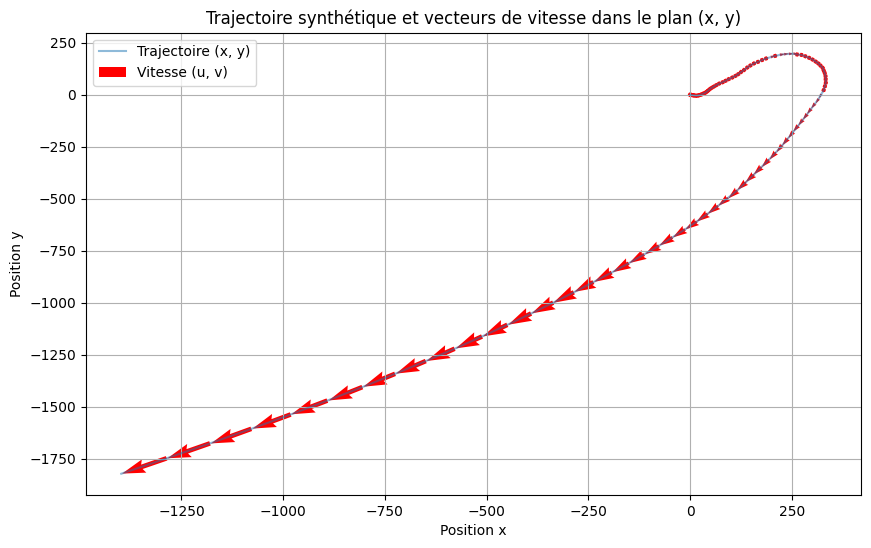

In [22]:
import matplotlib.pyplot as plt 

def MUA_gen(length, T, x_0):
    L = []
    L.append(x_0)  # Ensure x_0 is a column vector
    Q = np.array([
        [T ** 5 / 20, T ** 4 / 8, T ** 3 / 6],
        [T ** 4 / 8, T ** 3 / 3, T ** 2 / 2],
        [T ** 3 / 6, T ** 2 / 2, T]
    ])
    print("The white-noise jerk model is used")

    for i in range(length):
        U = np.random.randn(3, 1)  # Generate a random vector
        R = np.linalg.cholesky(Q)  # Cholesky decomposition
        B = R.T @ U  # Generate the noise vector
        print(B)
        # Update x with the new state
        phi = np.array([[1, T, T ** 2 / 2],
                        [0, 1, T],
                        [0, 0, 1]])
        x_new = phi @ L[-1] + B
        L.append(x_new)

    return L


length = 100
T = 1
x_0 = np.array([[0], [0], [0]])
WNJ_WSA = 1
x = MUA_gen(length, T, x_0)
y = MUA_gen(length, T, x_0)

x_coords = [xi[0, 0] for xi in x]
y_coords = [yi[0, 0] for yi in y]
u_speeds = [xi[1, 0] for xi in x]  # Speed in the x-direction (index 1)
v_speeds = [yi[1, 0] for yi in y]  # Speed in the y-direction (index 3)


plt.figure(figsize=(10, 6))
plt.plot(x_coords, y_coords, label='Trajectoire (x, y)', alpha=0.5)
plt.quiver(x_coords[:-1], y_coords[:-1], u_speeds[:-1], v_speeds[:-1],angles='xy',scale_units='xy', color='r', scale=1, label='Vitesse (u, v)')
plt.title('Trajectoire synthétique et vecteurs de vitesse dans le plan (x, y)')
plt.xlabel('Position x')
plt.ylabel('Position y')
plt.legend()
plt.grid(True)
plt.show()

In [70]:
import matplotlib.pyplot as plt 

def computeBmatrix(state:np.array, a_n_k:float, T:float):
    """
    Fonction qui va permettre de calculer la matrice B discrétiser qui dépend de l'état
    args:
     state -> np.array état du système à l'instant K 
    return:
        -> np.array matrice B dans l'équation discrète.
    """ 
    phi_k = np.atan(state[1]/state[3])
    omega_k = a_n_k / np.sqrt(state[1]**2 + state[3]**2)
    return np.array([[(1/omega_k)*T*np.cos(phi_k) + (1/omega_k**2)*np.sin(phi_k) - (1/omega_k**2)*np.sin(phi_k+omega_k*T), (1/omega_k**2)*np.cos(phi_k) - (1/omega_k)*T*np.sin(phi_k) - (1/omega_k**2)*np.cos(phi_k+omega_k*T)],
                     [(1/omega_k)*np.cos(phi_k) - (1/omega_k)*np.cos(phi_k + omega_k*T), (1/omega_k)*np.sin(phi_k + omega_k*T) - (1/omega_k)*np.sin(phi_k)],
                     [(1/omega_k**2)*np.cos(phi_k) - (1/omega_k)*T*np.sin(phi_k) - (1/omega_k**2)*np.cos(phi_k + omega_k*T), (1/omega_k**2)*np.sin(phi_k + omega_k*T) - (1/omega_k**2)*np.sin(phi_k) - (1/omega_k)*T*np.cos(phi_k)],
                     [(1/omega_k)*np.sin(phi_k + omega_k*T) - (1/omega_k)*np.sin(phi_k), (1/omega_k)*np.cos(phi_k + omega_k*T) - (1/omega_k)*np.cos(phi_k)]])

def MC_Gen(length:int,T:float, x_0:np.array):
    Etat = np.zeros(((len(x_0),length)))
    Etat[:,0] = x_0
    F = np.array([[1, T, 0, 0],   
                [0, 1, 0, 0],
                [0, 0, 1, T],
                [0, 0, 0, 1]])
    
    Q = np.array([[T**3 / 3, T**2 / 2, 0, 0],  
                  [T**2 / 2, T, 0, 0],
                  [0, 0, T**3 / 3, T**2 / 2],
                  [0, 0, T**2 / 2, T]])
    
      # point à modifier je veux compute accélération normale et tangentielle, tangentielle premier (numériquement à chaque etat)
    for k in range(1,length):
        w_k = np.random.multivariate_normal(mean=[0, 0, 0, 0], cov=Q)
        state = Etat[:,k-1]
        a_k = np.random.randn(2,1)
        #print(a_k)
        a_n_k = a_k[1]
        B = computeBmatrix(state=state, a_n_k= a_n_k, T=T)
        Etat[:,k] = F @ Etat[:,k-1] + B @ a_k.T + w_k # il me faut a_k pour avoir une bonne simulation 
    plt.figure(figsize=(10, 6))
    plt.plot(Etat[0, :], Etat[2, :], label='Trajectoire (x, y)') 
    plt.title('Trajectoire synthétique dans le plan (x, y)')
    plt.xlabel('Position x')
    plt.ylabel('Position y')
    plt.legend()
    plt.grid(True)
    plt.show()
    print(f"{np.mean(Etat[0,:])=}")
            
        
        
MC_Gen(500, 1.0, np.array([0,1,0,1]))
    




ValueError: operands could not be broadcast together with shapes (4,) (4,2,2) 

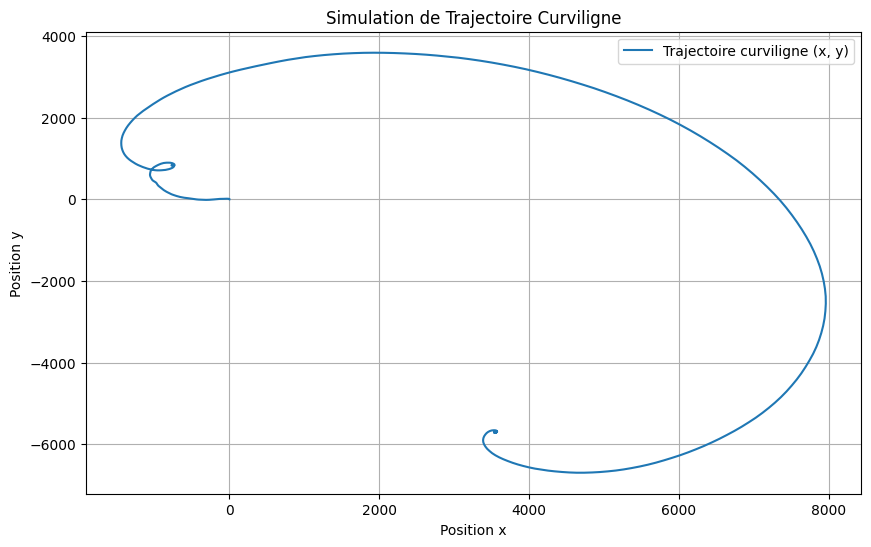

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_curvilinear_motion(T, length, x_0):
    
    states = np.zeros((6, length))
    states[:, 0] = x_0

    
    Q = np.diag([T**3 / 3, T**2 / 2, T**3 / 3, T**2 / 2, 0.1, 0.1])

    for k in range(1, length):
        
        x, v_x, y, v_y, a_t, a_n = states[:, k-1]

        
        theta_k = np.arctan2(v_y, v_x)
        
        # Définir la matrice de transition d'état F
        F = np.array([
            [1, T, 0, 0, 0, 0],
            [0, 1, 0, 0, T * np.cos(theta_k), -T * np.sin(theta_k)],
            [0, 0, 1, T, 0, 0],
            [0, 0, 0, 1, T * np.sin(theta_k), T * np.cos(theta_k)],
            [0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 1]
        ])

        # Bruit de processus
        w_k = np.random.multivariate_normal(mean=[0, 0, 0, 0, 0, 0], cov=Q)

        
        states[:, k] = F @ states[:, k-1] + w_k

    return states

# Paramètres de simulation
T = 1.0
length = 500
x_0 = np.array([0, 1, 0, 1, 0.5, 0.2])  # positions, vitesses, accélérations initiales

# Générer la trajectoire
states = simulate_curvilinear_motion(T, length, x_0)

# Visualiser la trajectoire
plt.figure(figsize=(10, 6))
plt.plot(states[0, :], states[2, :], label="Trajectoire curviligne (x, y)")
plt.xlabel("Position x")
plt.ylabel("Position y")
plt.title("Simulation de Trajectoire Curviligne")
plt.grid(True)
plt.legend()
plt.show()